# 100_Genre_Results

Research Question: "How does the prominence and popularity of movie genres change over time?"

### Purpose

The purpose of this notebook is to state and visualise our main results for RQ1. In this notebook we will outline and analyse the results we obtained and try to make sense of them

# Loading the Data

In [1]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import DataFrame

In [9]:
details = pd.read_pickle('../../data/final/Movies_Details.pkl')

In [10]:
details.head()

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
0,2,Drama|Crime,0.823904,1988-10-21,69.0,Ariel,7.1,40,1,1,...,0,0,0,0,0,0,0,0,1988,10
1,3,Drama|Comedy,0.474450,1986-10-16,76.0,Shadows in Paradise,7.0,32,1,0,...,0,0,0,0,0,0,0,0,1986,10
2,5,Crime|Comedy,1.698000,1995-12-25,98.0,Four Rooms,6.5,485,0,1,...,0,0,0,0,0,0,0,0,1995,12
3,6,Action|Thriller|Crime,1.322870,1993-10-15,110.0,Judgment Night,6.5,69,0,1,...,0,0,0,0,0,0,0,0,1993,10
4,8,Documentary,0.054716,2006-01-01,80.0,Life in Loops (A Megacities RMX),6.4,4,0,0,...,0,0,0,0,0,0,0,0,2006,1


# Visualisations

This section includes the main visualisations used to answer RQ1. These visualisations will illustrate the prominence and popularity of movie genres and how they both changed over time. 

# The prominence of movies from 1874-2017

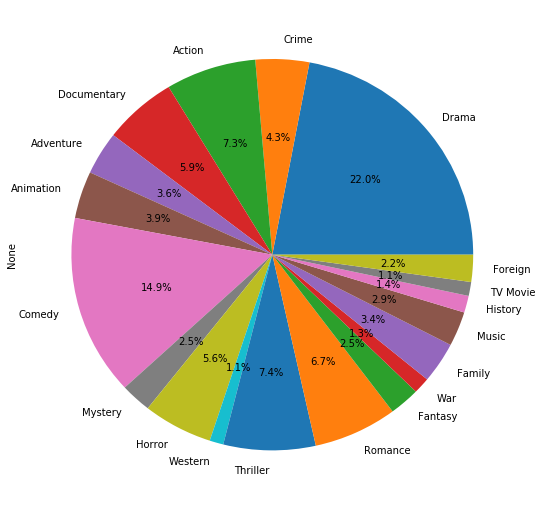

In [11]:
details[['Drama', 'Crime', 'Action', 'Documentary', 'Adventure', 'Animation', 
         'Comedy', 'Mystery', 'Horror', 'Western', 'Thriller', 'Romance', 
         'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum().plot(kind = 'pie', figsize = (9,9), y = 'Movies', autopct='%1.1f%%')


First we looked into what are the most prominent genres over the last 100+ years. We found that over all this time Drama and Comedy movies dominated the movie industry making up 35.8% of it. While this shows that some genres are indeed more prominent than others, it does not visualise this by year and therefore, more analysis is required to answer the research question

## The prominence of movie genres by year

Text(0,0.5,'Releases')

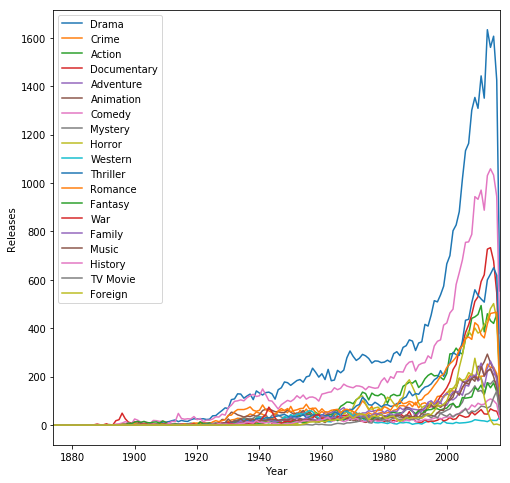

In [12]:
details.groupby(['Year'])[['Drama', 'Crime', 'Action', 'Documentary', 'Adventure', 'Animation', 
         'Comedy', 'Mystery', 'Horror', 'Western', 'Thriller', 'Romance', 
         'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum().plot(figsize = (8,8))
plt.ylabel('Releases')

This graph shows us that there was a major increase in the number of movies being made from the years 2000 onwards. Of course, it shows genres such as drama and comedy on top for nearly all of the years. This is a good representation of the positive correlation that exists, however, it is quite difficult to make sense of which line belongs to which genre, therefore a better approach is needed.

# Movie genre popularity and prominence from the years 1990 - 2016

This will allow us to have clearer visualisations of the data. 

In [13]:
x = details[(details.Year >= 1990)&(details.Year <= 2016)]
x

,Movie ID,Genres,Popularity,Released,Runtime,Movie Title,Average Rating,Number of Ratings,Drama,Crime,...,Romance,Fantasy,War,Family,Music,History,TV Movie,Foreign,Year,Month
2,5,Crime|Comedy,1.698000,1995-12-25,98.0,Four Rooms,6.5,485,0,1,...,0,0,0,0,0,0,0,0,1995,12
3,6,Action|Thriller|Crime,1.322870,1993-10-15,110.0,Judgment Night,6.5,69,0,1,...,0,0,0,0,0,0,0,0,1993,10
4,8,Documentary,0.054716,2006-01-01,80.0,Life in Loops (A Megacities RMX),6.4,4,0,0,...,0,0,0,0,0,0,0,0,2006,1
5,9,Drama,0.001647,2004-02-09,15.0,Sunday in August,5.3,2,1,0,...,0,0,0,0,0,0,0,0,2004,2
7,12,Animation|Family,9.915573,2003-05-30,100.0,Finding Nemo,7.6,5531,0,0,...,0,0,0,1,0,0,0,0,2003,5
8,13,Comedy|Drama|Romance,10.351236,1994-06-07,142.0,Forrest Gump,8.2,7204,1,0,...,1,0,0,0,0,0,0,0,1994,6
9,14,Drama,8.191009,1999-09-15,122.0,American Beauty,7.9,2994,1,0,...,0,0,0,0,0,0,0,0,1999,9
11,16,Drama|Crime|Music,2.106217,2000-05-17,140.0,Dancer in the Dark,7.6,348,1,1,...,0,0,0,0,1,0,0,0,2000,5
12,17,Horror|Thriller|Mystery,1.253999,2006-01-26,87.0,The Dark,5.6,69,0,0,...,0,0,0,0,0,0,0,0,2006,1
13,18,Adventure|Fantasy|Action|Thriller|Science Fiction,9.233786,1997-07-05,126.0,The Fifth Element,7.2,3629,0,0,...,0,1,0,0,0,0,0,0,1997,7


To calculate genre popularity, we grouped each genre by year, found its average popularity for that year, then saved the result into a new dataset. This will all be merged into one dataset which will consist of the average popularity for each genre by year.

In [14]:
drama = x.groupby(['Year', 'Drama'], as_index=False)['Popularity'].aggregate(np.mean) 
popdrama = drama[np.all(drama != 0, axis=1)]

romance = x.groupby(['Year', 'Romance'], as_index=False)['Popularity'].aggregate(np.mean)
popromance = romance[np.all(romance != 0, axis=1)]

action = x.groupby(['Year', 'Action'], as_index=False)['Popularity'].aggregate(np.mean)
popaction = action[np.all(action != 0, axis=1)]

comedy = x.groupby(['Year', 'Comedy'], as_index=False)['Popularity'].aggregate(np.mean)
popcomedy = comedy[np.all(comedy != 0, axis=1)]

documentary = x.groupby(['Year', 'Documentary'], as_index=False)['Popularity'].aggregate(np.mean)
popdocumentary = documentary[np.all(documentary != 0, axis=1)]

horror = x.groupby(['Year', 'Horror'], as_index=False)['Popularity'].aggregate(np.mean)
pophorror = horror[np.all(horror != 0, axis=1)]

thriller= x.groupby(['Year', 'Thriller'], as_index=False)['Popularity'].aggregate(np.mean)
popthriller = thriller[np.all(thriller != 0, axis=1)]

scifi= x.groupby(['Year', 'Science Fiction'], as_index=False)['Popularity'].aggregate(np.mean)
popscifi = scifi[np.all(scifi != 0, axis=1)]

crime= x.groupby(['Year', 'Crime'], as_index=False)['Popularity'].aggregate(np.mean)
popcrime = crime[np.all(crime != 0, axis=1)]

adventure = x.groupby(['Year', 'Adventure'], as_index=False)['Popularity'].aggregate(np.mean)
popadventure = adventure[np.all(adventure != 0, axis=1)]

animation = x.groupby(['Year', 'Animation'], as_index=False)['Popularity'].aggregate(np.mean)
popanimation = animation[np.all(animation != 0, axis=1)]

mystery = x.groupby(['Year', 'Mystery'], as_index=False)['Popularity'].aggregate(np.mean)
popmystery = mystery[np.all(mystery != 0, axis=1)]

western = x.groupby(['Year', 'Western'], as_index=False)['Popularity'].aggregate(np.mean)
popwestern = western[np.all(western != 0, axis=1)]

fantasy = x.groupby(['Year', 'Fantasy'], as_index=False)['Popularity'].aggregate(np.mean)
popfantasy = fantasy[np.all(fantasy != 0, axis=1)]

war = x.groupby(['Year', 'War'], as_index=False)['Popularity'].aggregate(np.mean)
popwar = war[np.all(war != 0, axis=1)]

family = x.groupby(['Year', 'Family'], as_index=False)['Popularity'].aggregate(np.mean)
popfamily = family[np.all(family != 0, axis=1)]

music = x.groupby(['Year', 'Music'], as_index=False)['Popularity'].aggregate(np.mean)
popmusic = music[np.all(music != 0, axis=1)]

history = x.groupby(['Year', 'History'], as_index=False)['Popularity'].aggregate(np.mean)
pophistory = history[np.all(history != 0, axis=1)]

tv = x.groupby(['Year', 'TV Movie'], as_index=False)['Popularity'].aggregate(np.mean)
poptv = tv[np.all(tv != 0, axis=1)]

foreign = x.groupby(['Year', 'Foreign'], as_index=False)['Popularity'].aggregate(np.mean)
popforeign = foreign[np.all(foreign != 0, axis=1)]

In [15]:
pop = pd.DataFrame()
pop['Year'] = popdrama.Year
pop['Drama'] = popdrama.Popularity
pop['Crime'] = popcrime.Popularity
pop['Action'] = popaction.Popularity
#pop['Documentary'] = popdocumentary.Popularity
#pop['Adventure'] = popadventure.Popularity
pop['Animation'] = popanimation.Popularity
pop['Comedy'] = popcomedy.Popularity
pop['Mystery'] = popmystery.Popularity
pop['Horror'] = pophorror.Popularity
#pop['Western'] = popwestern.Popularity
pop['Sci Fi'] = popscifi.Popularity
pop['Thriller'] = popthriller.Popularity
pop['Romance'] = popromance.Popularity
pop['Fantasy'] = popfantasy.Popularity
pop['War'] = popwar.Popularity
pop['Family'] = popfamily.Popularity
#pop['Music'] = popmusic.Popularity
pop['History'] = pophistory.Popularity
#pop['TV Movie'] = poptv.Popularity
#pop['Foreign'] = popforeign.Popularity

pop

,Year,Drama,Crime,Action,Animation,Comedy,Mystery,Horror,Sci Fi,Thriller,Romance,Fantasy,War,Family,History
1,1990,0.461697,0.555855,0.435668,0.250982,0.400908,0.518225,0.370160,0.574443,0.665192,0.612748,0.769182,0.269403,0.625199,0.444059
3,1991,0.383191,0.614096,0.536348,0.326007,0.453491,0.425458,0.301281,0.414326,0.595523,0.519935,0.654105,0.454438,0.804969,0.272287
5,1992,0.360291,0.628161,0.509158,0.380360,0.467053,0.540889,0.500797,0.520740,0.588103,0.590949,0.815368,0.604127,0.643455,0.547081
7,1993,0.427743,0.605444,0.513449,0.423483,0.461537,0.610360,0.377233,0.527958,0.553422,0.517573,0.766713,0.761360,0.755175,0.864296
9,1994,0.479804,0.965214,0.455352,0.368010,0.534815,0.633964,0.363314,0.348835,0.608297,0.667211,0.618289,0.439525,0.621934,0.350870
11,1995,0.429793,0.913516,0.591795,0.444276,0.469097,0.731265,0.294524,0.573076,0.703951,0.476433,0.657020,0.788880,0.596473,0.594642
13,1996,0.425656,0.653209,0.528612,0.334579,0.428924,0.786644,0.403663,0.429171,0.669234,0.478844,0.522884,0.529246,0.577950,0.303122
15,1997,0.388005,0.585733,0.651579,0.419640,0.396120,0.900625,0.474742,0.820005,0.825720,0.507597,0.788263,0.244606,0.519209,0.438213
17,1998,0.428560,0.637001,0.571992,0.672576,0.467414,0.782690,0.394152,0.515516,0.547007,0.443793,0.627527,0.677213,0.700480,0.874662
19,1999,0.452247,0.606830,0.561774,0.490347,0.460878,1.018363,0.359010,0.709224,0.550820,0.421681,0.849439,0.542598,0.538968,0.435297


# Popularity of movie genres from years 1990 - 2016

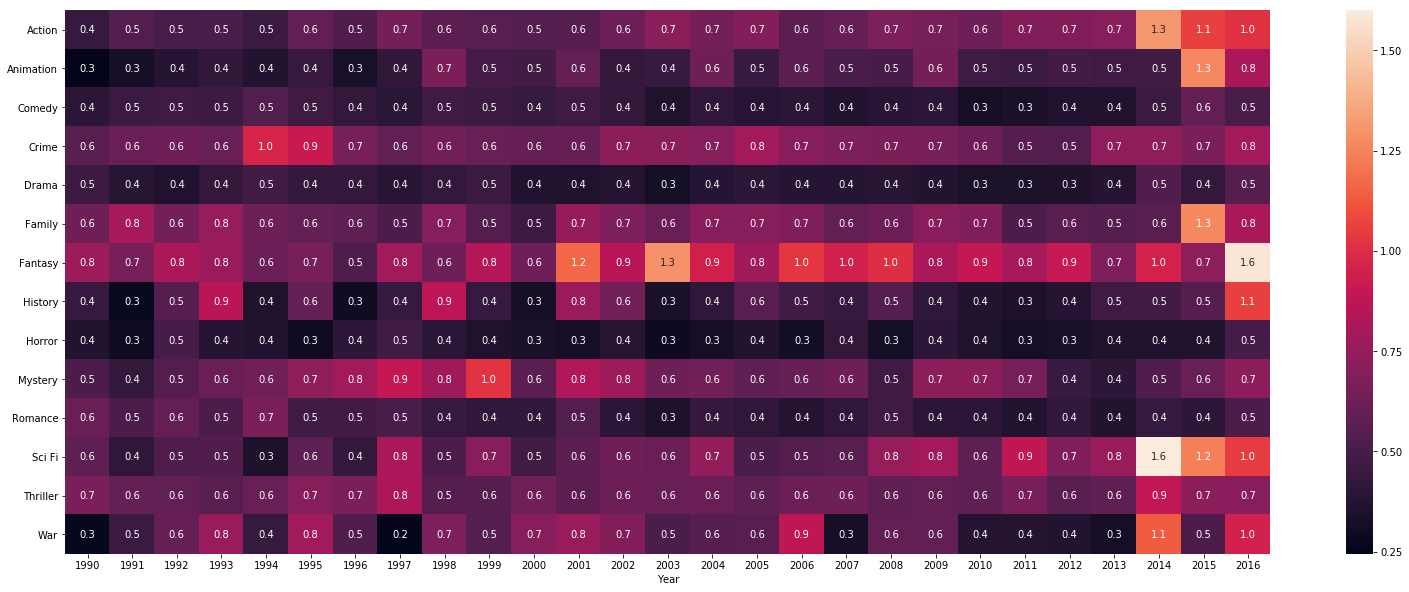

In [16]:
plt.figure(figsize = (27,10))
popdf = pop.pivot_table(index = 'Year')
tr = popdf.transpose()
sns.heatmap(tr, annot=True, fmt=".1f")

This heat map show that the most popular movie genre is Adventure, in fact, it is so popular that it is hard to see all the other genres surrounding it. The main genres that make some kind of an appearance are fantasy and sci fi. This makes a lot of sense as all the major blockbuster at the moment consist of these genres.

In [17]:
sum_genre = details.groupby(['Year'])[['Crime', 'Adventure', 'Animation', 
          'Mystery', 'Western', 
         'Fantasy', 'War', 'Family', 'Music', 'History', 'TV Movie', 'Foreign'
        ]].sum()

In [18]:
x = sum_genre[(sum_genre.index >= 1990)&(sum_genre.index <= 2016)]
x.head()

,Crime,Adventure,Animation,Mystery,Western,Fantasy,War,Family,Music,History,TV Movie,Foreign
Year,,,,,,,,,,,,
1990,94,64,44,35,6,47,15,33,40,14,27,29
1991,71,62,61,31,7,58,12,50,32,17,23,32
1992,88,60,66,36,4,46,11,58,48,19,32,28
1993,92,74,50,43,11,58,22,69,42,24,43,37
1994,82,90,79,47,16,63,13,94,38,22,39,44


# Prominence of genres from 1990 - 2016

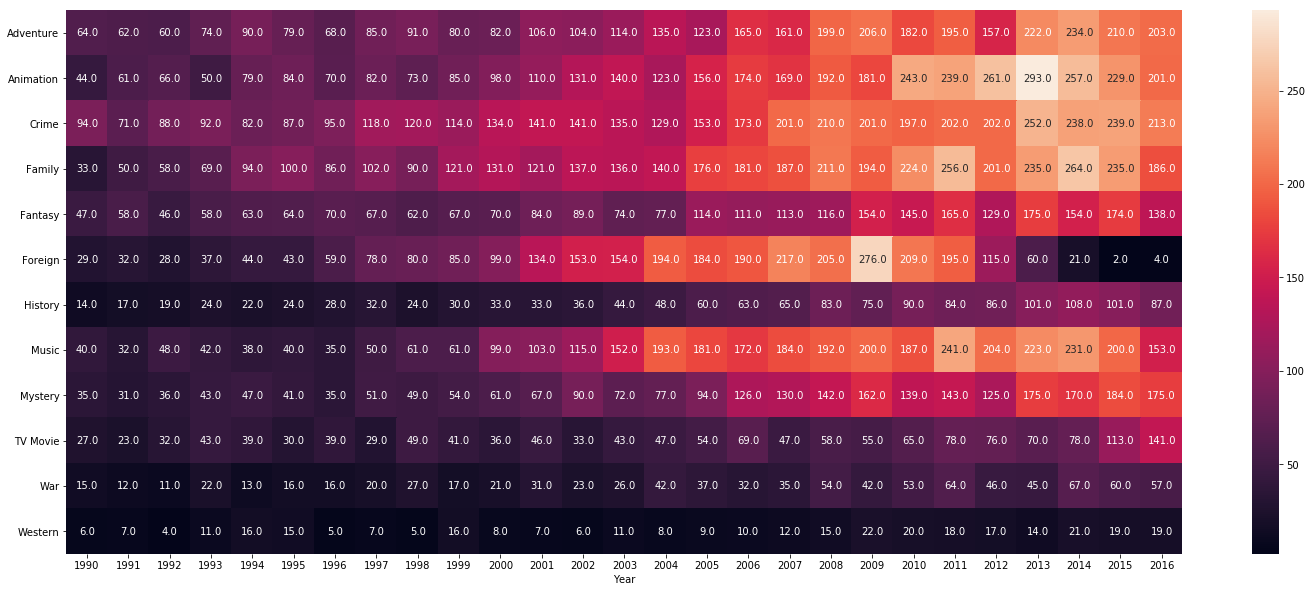

In [19]:
plt.figure(figsize = (25,10))
df = x.pivot_table(index = 'Year')
t = df.transpose()
sns.heatmap(t, annot=True, fmt=".1f")


This heat map shows how all the genres are becoming more prominent, especially from the years 2000 onwards. This also related to the line graph showing this correlation. This map only consists of the less prominent genres as the more popular ones resulted in clouded results. 

In [20]:
big_genre = details.groupby(['Year'])[['Action', 'Comedy', 'Documentary', 'Drama', 'Horror', 'Romance', 'Thriller'
        ]].sum()

In [21]:
a = big_genre[(big_genre.index >= 1990)&(big_genre.index <= 2016)]
a.head()

,Action,Comedy,Documentary,Drama,Horror,Romance,Thriller
Year,,,,,,,
1990,184,223,42,308,130,83,130
1991,155,248,51,339,90,102,127
1992,168,255,64,344,72,105,145
1993,191,258,59,416,80,122,157
1994,205,286,71,409,67,130,161


# Top 7 most prominent genres

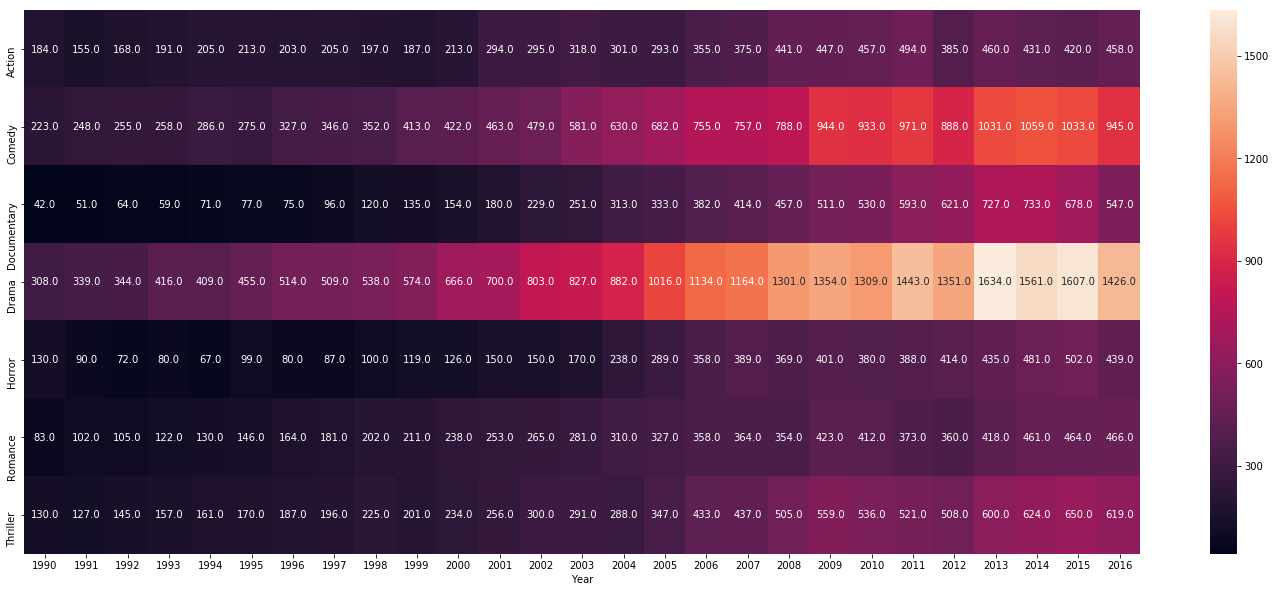

In [22]:
plt.figure(figsize = (25,10))
df = a.pivot_table(index = 'Year')
b = df.transpose()
sns.heatmap(b, annot=True, fmt=".1f")


This heatmap shows the 7 most prominent genres, they all had to be taken away from the main results as they were clouding the results, however, even here Drama and Comedy can be seen clearly as the most prominent genres. 

# Conclusion

The focus of this question was to examine how the prominence and popularity of movie genres change over time. Through our analysis we were able to conclude that in general the trend is that more movies are being released every year, which in turn, increases the prominence of all genres. We found that some genres are much more prominent than others, these genres being Drama followed by Comedy. It was interesting to see that while these genres were so prominent this did not make them popular, as the most popular genres were Adventure, Action, Fantasy and Sci Fi. This result wasn’t that surprising as most of the big budget blockbusters tend to be at least one if not all of these genres. 